In [1]:
import pandas as pd 
import numpy as np 
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('fashion_mnist_test.csv.zip')

In [3]:
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.shape

(10000, 785)

In [5]:
x = df.iloc[:, 1:] / 255.0
y = df.iloc[:, 0]

In [6]:
x.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.035294,0.031373,0.000000,...,0.403922,0.341176,0.219608,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.133333,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.054902,0.207843,0.388235,0.066667,...,0.000000,0.000000,0.000000,0.0,0.247059,0.207843,0.121569,0.000000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.631373,...,0.537255,0.494118,0.549020,0.0,0.521569,0.878431,0.870588,0.219608,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0


In [7]:
scaler = StandardScaler()

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=None)

In [9]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [10]:
pca = PCA(n_components=0.95)
pca_x_train = pca.fit_transform(x_train)
pca_x_test = pca.transform(x_test)

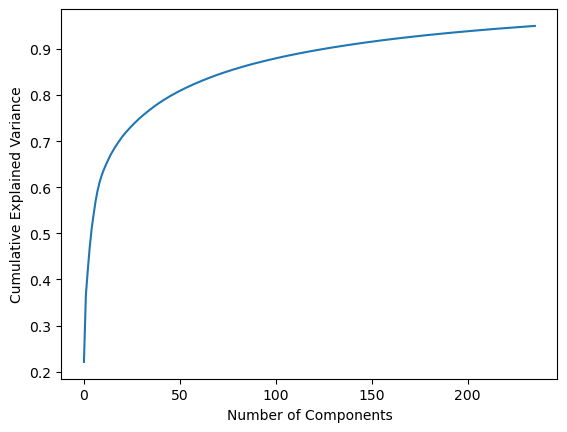

In [11]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [23]:
for i in range(1, 785):
    model = KNeighborsClassifier(n_neighbors=i)

    model.fit(pca_x_train, y_train)

    y_pred = model.predict(pca_x_test)

    accuracy = accuracy_score(y_pred, y_test)

    print(f'Accuracy score of fashion_mnist is: {accuracy*100:.2f}%')

Accuracy score of fashion_mnist is: 80.77%
Accuracy score of fashion_mnist is: 81.23%
Accuracy score of fashion_mnist is: 83.00%
Accuracy score of fashion_mnist is: 82.70%
Accuracy score of fashion_mnist is: 83.27%
Accuracy score of fashion_mnist is: 83.00%
Accuracy score of fashion_mnist is: 82.70%
Accuracy score of fashion_mnist is: 82.60%
Accuracy score of fashion_mnist is: 82.50%
Accuracy score of fashion_mnist is: 82.80%
Accuracy score of fashion_mnist is: 82.37%
Accuracy score of fashion_mnist is: 82.63%
Accuracy score of fashion_mnist is: 82.43%
Accuracy score of fashion_mnist is: 82.17%
Accuracy score of fashion_mnist is: 82.27%
Accuracy score of fashion_mnist is: 82.17%
Accuracy score of fashion_mnist is: 81.97%
Accuracy score of fashion_mnist is: 81.70%


KeyboardInterrupt: 

In [35]:
model = KNeighborsClassifier(n_neighbors=5)

In [36]:
model.fit(pca_x_train, y_train)

KNeighborsClassifier()

In [37]:
y_pred = model.predict(pca_x_test)

In [38]:
accuracy = accuracy_score(y_pred, y_test)

In [39]:
print(f'Accuracy score of fashion_mnist is: {accuracy*100:.2f}%')

Accuracy score of fashion_mnist is: 83.27%


## Accuracy Graph for KNeighborsClassifier()

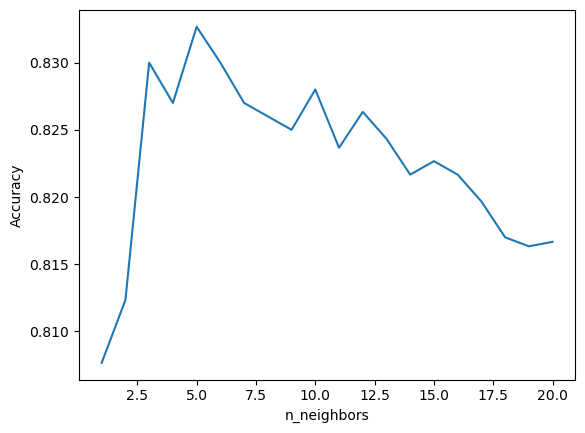

In [24]:
import matplotlib.pyplot as plt
k_values = range(1, 21)
accuracies = []

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(pca_x_train, y_train)
    accuracies.append(model.score(pca_x_test, y_test))

plt.plot(k_values, accuracies)
plt.xlabel("n_neighbors")
plt.ylabel("Accuracy")
plt.show()